ADELINE M  
215229146

# CHAPTER 1: Predicting students admission with Logistic Regression


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# PART 1 - Data Handling

In [2]:
# Importing data with pandas
data = pd.read_csv("dataset_admissions.csv")

In [3]:
# Showing an overview of our data
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
# The shape property returns a tuple representing the dimensionality of the DataFrame  
# The format of shape is (rows, columns)
data.shape 

(400, 4)

In [5]:
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. W
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [6]:
data.std() # std() is to get the standard deviation   
# Standard deviation (S) = square root of the variance
# Variance is the average squared deviations from the mean, while standard deviation is the square root of this number. 

admit      0.466087
gre      115.516536
gpa        0.380567
rank       0.944460
dtype: float64

In [7]:
#The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear.
pd.crosstab(data['admit'], data['rank'], rownames = ['admitted'])

rank,1,2,3,4
admitted,,,,
0,28,97,93,55
1,33,54,28,12


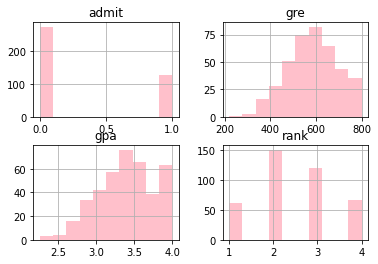

In [8]:
data.hist(color="pink")
plt.show()

In [9]:
dummy_rank = pd.get_dummies(data['rank'],prefix="rank") # converte a variável categórica (1,2,3,4) para valores binários 
dummy_rank.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [10]:
collumns_to_keep = ['admit','gre','gpa']
data = data[collumns_to_keep].join(dummy_rank[['rank_1','rank_2','rank_3','rank_4']])
data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [11]:
# defining x and y
X = data.drop('admit',axis=1) # In pandas, axis=1 stands for columns / aqui estou dizendo q quero dar o drop na coluna admit
X

,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,380,3.61,0,0,1,0
1,660,3.67,0,0,1,0
2,800,4.00,1,0,0,0
3,640,3.19,0,0,0,1
4,520,2.93,0,0,0,1
...,...,...,...,...,...,...
395,620,4.00,0,1,0,0
396,560,3.04,0,0,1,0
397,460,2.63,0,1,0,0
398,700,3.65,0,1,0,0


In [12]:
Y = data['admit']
Y

0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 400, dtype: int64

# PART 2 - Data Analysis

In [13]:
from sklearn.model_selection import train_test_split
 

In [14]:
X_train,X_test, Y_train,Y_real = train_test_split(X,Y,test_size=0.2) #20% é para teste (x, y) / 80% para treinamento (x e y)

In [15]:
from sklearn.linear_model import LogisticRegression
 

In [16]:
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
log_reg = LogisticRegression(solver = 'liblinear')

In [17]:
#training the model 
log_reg.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [18]:
#salvando o teste do modelo numa variável 
y_pred = log_reg.predict(X_test)

In [19]:
y_pred   

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

##### Observation:

Note that one class is dominating the other.  The more is predicting more situations where the result is False. That leads to biases in the model. This model will be biased towards rejecting.  I will do Part 3 anyways, only to see the results. After this I will apply a resampling method and create a new model. 

# PART 3 - Valuation Analysis: Performance Measurement & K-Fold 

## Performance Measurement 

#### a) Accuracy  

In [20]:
from sklearn import metrics

In [21]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy = metrics.accuracy_score(Y_real,y_pred)  
accuracy

0.7625

#### b) Precision 

In [22]:
# Precision = true positive / true positive + false positive
precision = metrics.precision_score(Y_real,y_pred)  
precision

0.4

#### c) Recall

In [23]:
# Recall = true positive / true positive + false negative
recall = metrics.recall_score(Y_real,y_pred)  
recall

0.23529411764705882

#### d) Confusion matrix

In [24]:
import seaborn as sns

In [25]:
confusion_matrix = metrics.confusion_matrix(Y_real,y_pred)
confusion_matrix

array([[57,  6],
       [13,  4]], dtype=int64)

<AxesSubplot:>

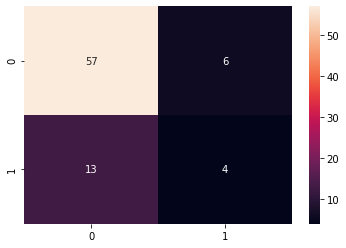

In [26]:
# 0,0: 53 => True Negative
# 0,1: 0  => False Positive 
# 1,0: 23 => False Negative 
# 1,1: 4 =>  True Positive 
sns.heatmap(confusion_matrix, annot=True)

#### e) AUC - ROC curve

In [27]:
auc = metrics.roc_auc_score(Y_real, y_pred) # as the documentation explain, the main parameters are: y_true and y_score
auc

0.5700280112044818

## K-Fold

In [28]:
# Now using kfold, a model validation technique where it's not using your pre-trained model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5,shuffle=True)  
cv_r = cross_val_score(log_reg, X, Y, cv=kf)
np.mean(cv_r)

0.6925

# CHAPTER 2: Predicting students admission with Logistic Regression, Decision Tree, SVM and Random Forest 

#### Observation:

In Chapter 1, the data has shown that one class dominates the other. In such a case, the model will have a hard time learning from data to predict future classes. Next, I will apply a resampling method and then use Logistic Regression again. After this, I will also use three other algorithms: Decision Tree, SVM and Random Forest. Finally, I will do the Valuation Analisis (Performance Measurement & K-Fold)

 # PART 1 - Data Handling: Resampling   
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. There are two main ways to perform random resampling: Undersampling and Oversampling. 
* Oversampling — Duplicating samples from the minority class. 
* Undersampling — Deleting samples from the majority class.

Random Sampling involves creating a new transformed version of the data with a new class distribution. The goal is to reduce the influence of the data on our ML algorithm. Generally, oversampling is preferable as under sampling can result in the loss of important data.
 

In [29]:
from sklearn.utils import resample

In [30]:
# Counting how many admissions are in the dataset 
data[data['admit']==1].count()

admit     127
gre       127
gpa       127
rank_1    127
rank_2    127
rank_3    127
rank_4    127
dtype: int64

In [31]:
# Counting how many rejections are in the dataset 
data[data['admit']==0].count()

admit     273
gre       273
gpa       273
rank_1    273
rank_2    273
rank_3    273
rank_4    273
dtype: int64

In [32]:
# Creating variables to store the results 
majority = data[data['admit']==0]
minority = data[data['admit']==1]

In [33]:
# Applying a resampling strategy (Oversampling) to obtain a more balanced data
minority_upsample = resample(minority, replace = True, n_samples=273, random_state=123) 

In [34]:
new_data = pd.concat([majority,minority_upsample])
new_data.describe()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,0.500000,599.010989,3.414835,0.188645,0.384615,0.278388,0.148352
std,0.500459,118.855906,0.394142,0.391585,0.486950,0.448617,0.355774
min,0.000000,220.000000,2.260000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.140000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,600.000000,3.445000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,680.000000,3.710000,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


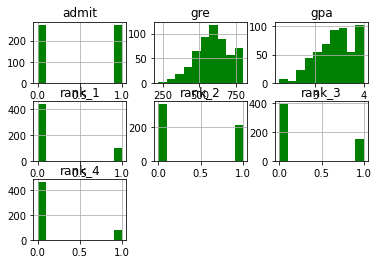

In [35]:

new_data.hist(color="green")
plt.show()

In [36]:
# Creating X 
X = new_data.drop("admit",axis=1)
X

,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,380,3.61,0,0,1,0
4,520,2.93,0,0,0,1
7,400,3.08,0,1,0,0
9,700,3.92,0,1,0,0
10,800,4.00,0,0,0,1
...,...,...,...,...,...,...
391,660,3.88,0,1,0,0
5,760,3.00,0,1,0,0
317,780,3.63,0,0,0,1
263,620,3.95,0,0,1,0


In [37]:
# Creating Y
Y = new_data["admit"]
Y

0      0
4      0
7      0
9      0
10     0
      ..
391    1
5      1
317    1
263    1
277    1
Name: admit, Length: 546, dtype: int64

 # PART 2 - Data Analysis


In [38]:
from sklearn.model_selection import train_test_split 

In [39]:
X_train,X_test,Y_train,Y_real = train_test_split(X,Y,test_size=0.2) # test size will be 20% and train size will be 80%

# Part 2.1. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

#### LIBLINEAR -- A Library for Large Linear Classification

The solvers implemented in the class Logistic Regression are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”. According to Scikit Documentation: The “liblinear” solver was the one used by default for historical reasons before version 0.22. Since then, default use is lbfgs Algorithm.
 

In [41]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [42]:
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

### Logistic Regression - Performance measurement

#### a) Accuracy    

In [43]:
from sklearn import metrics

In [44]:
acc_lg = metrics.accuracy_score(Y_real, y_pred)
acc_lg

0.6181818181818182

#### b) Precision

In [45]:
pre_lg = metrics.precision_score(Y_real, y_pred)
pre_lg

0.6545454545454545

#### c) Recall  

In [46]:
rec_lg = metrics.recall_score(Y_real, y_pred)
rec_lg

0.6101694915254238

#### d) Confusion matrix

In [47]:
cm_lg = metrics.confusion_matrix(Y_real,y_pred)
cm_lg

array([[32, 19],
       [23, 36]], dtype=int64)

<AxesSubplot:>

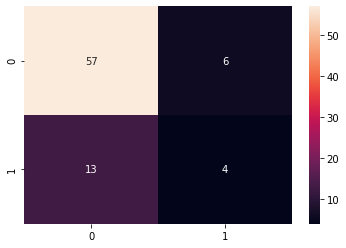

In [48]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

#### e) AUC - ROC curve

In [49]:
auc_lg = metrics.roc_auc_score(Y_real, y_pred) # as the documentation explain, the main parameters are: y_true and y_score
auc_lg

0.6188102359587904

### Logistic Regression - KFold

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [51]:
kf_lg = KFold(n_splits = 5,shuffle=True)
cv_lg = cross_val_score(lr_model, X, Y, cv=kf_lg)
np.mean(cv_lg)

0.6318765638031694

# Part 2.2. Decision Tree

In [52]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth=3)

In [53]:
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

### Decision Tree - Performance measurement

#### a) Accuracy

In [54]:
acc_dt = tree_model.score(X_test,Y_real) 
acc_dt

0.6

 #### b) Precision   

In [55]:
pre_dt = metrics.precision_score(Y_real, y_pred)
pre_dt

0.6545454545454545

  #### c) Recall   

In [56]:
rec_dt = metrics.recall_score(Y_real, y_pred)
rec_dt

0.6101694915254238

   #### d) Confusion matrix  

In [57]:
cm_dt = metrics.confusion_matrix(Y_real,y_pred)
cm_dt

array([[32, 19],
       [23, 36]], dtype=int64)

  #### e) AUC - ROC curve

In [58]:
auc_dt = metrics.roc_auc_score(Y_real, y_pred) # as the documentation explain, the main parameters are: y_true and y_score
auc_dt

0.6188102359587904

### Decision Tree - KFold

In [59]:
kf_dt = KFold(n_splits = 5,shuffle=True)
cv_dt = cross_val_score(tree_model, X, Y, cv=kf_dt)
np.mean(cv_dt)

0.6172310258548791

# Part 2.3. SVM - SVC 

In [60]:
from sklearn import svm

In [61]:
model_SVC = svm.SVC(kernel="linear")
model_SVC

SVC(kernel='linear')

In [62]:
model_SVC.fit(X_train,Y_train)

SVC(kernel='linear')

In [63]:
Y_pred = model_SVC.predict(X_test)
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

### SVM - SVC - Performance measurement

#### a) Accuracy

In [64]:
acc_svc = metrics.accuracy_score(Y_pred,Y_real)  
acc_svc

0.6

 #### b) Precision   

In [65]:
pre_svc = metrics.precision_score(Y_real, y_pred)
pre_svc

0.6545454545454545

  #### c) Recall   

In [66]:
rec_svc = metrics.recall_score(Y_real, y_pred)
rec_svc

0.6101694915254238

   #### d) Confusion matrix  

In [67]:
cm_svc = metrics.confusion_matrix(Y_real,y_pred)
cm_svc

array([[32, 19],
       [23, 36]], dtype=int64)

  #### e) AUC - ROC curve

In [68]:
auc_svc = metrics.roc_auc_score(Y_real, y_pred) # as the documentation explain, the main parameters are: y_true and y_score
auc_svc

0.6188102359587904

### SVM-SVC K-Fold


In [69]:
kf_svm = KFold(n_splits = 5,shuffle=True)
cv_svm = cross_val_score(model_SVC, X, Y, cv=kf_svm)
np.mean(cv_svm)

0.597164303586322

# Part 2.4. Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model_random_forest = RandomForestClassifier().fit(X_train,Y_train)
y_pred_random_forest = model_random_forest.predict(X_test)
y_pred_random_forest

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

### Random Forest - Performance measurement

 #### a) Accuracy   

In [72]:
acc_rf = metrics.accuracy_score(Y_real,y_pred_random_forest)   
acc_rf

0.8272727272727273

  #### b) Precision   

In [73]:
metrics.precision_score(Y_real, y_pred_random_forest)

0.7777777777777778

  #### c) Recall    

In [74]:
metrics.recall_score(Y_real, y_pred_random_forest)

0.9491525423728814

  #### d) Confusion matrix   

In [75]:
metrics.roc_auc_score(Y_real, y_pred_random_forest)

0.8177135260884014

 #### e) AUC - ROC curve

In [76]:
metrics.confusion_matrix(Y_real,y_pred_random_forest)

array([[35, 16],
       [ 3, 56]], dtype=int64)

### Random Forest K-Fold


In [77]:
kf_rf = KFold(n_splits = 5,shuffle=True)
cv_rf = cross_val_score(model_SVC, X, Y, cv=kf_rf)
np.mean(cv_rf)

0.6097414512093411

# PART 3 - Valuation Analysis: Performance Measurement & K-Fold 


In Part 2 I did the performance measurement and K-fold of each ML model. Now I'll compare the accuracy of the different models (Accuracy comparison graph).

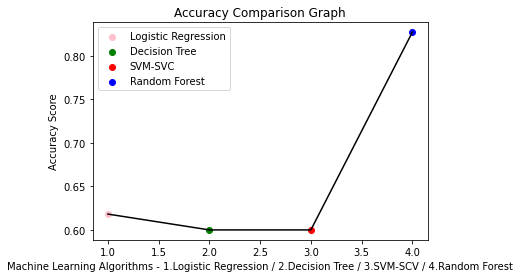

In [78]:
plt.title("Accuracy Comparison Graph")

plt.ylabel("Accuracy Score")

plt.xlabel("Machine Learning Algorithms - 1.Logistic Regression / 2.Decision Tree / 3.SVM-SCV / 4.Random Forest")

x = [acc_lg,acc_dt,acc_svc,acc_rf]

plt.plot([1,2,3,4],x, color = "black")

plt.scatter(1,acc_lg, marker="o", color="pink", label="Logistic Regression")

plt.scatter(2,acc_dt, marker="o", color="green", label="Decision Tree")

plt.scatter(3,acc_svc, marker="o", color="red", label="SVM-SVC")

plt.scatter(4,acc_rf, marker="o", color = "blue",label = "Random Forest")

plt.legend()

plt.show()